# 베스트 모델 만들기 - 와인 사례
## 이진 분류
## 베스트 모델 업데이트하기 - 자동 중단, 그래프로 확인

In [12]:
import numpy as np
import pandas as pd
import tensorflow as tf

from tensorflow.keras.models import Sequential, load_model
from tensorflow.keras.layers import Dense
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping

import matplotlib.pyplot as plt
%matplotlib inline

In [14]:
# seed 값 설정
seed = 0
np.random.seed(seed)
tf.random.set_seed(seed)

In [15]:
# 데이터 입력
df_pre = pd.read_csv('dataset/wine.csv', header=None)
df = df_pre.sample(frac=1)
dataset = df.values
X = dataset[:,0:12]
Y = dataset[:,12]

In [16]:
# 모델 설정
model = Sequential([
    Dense(30, input_dim=12, activation='relu'),
    Dense(12, activation='relu'),
    Dense(8, activation='relu'),
    Dense(1, activation='sigmoid')
]) 
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_4 (Dense)              (None, 30)                390       
_________________________________________________________________
dense_5 (Dense)              (None, 12)                372       
_________________________________________________________________
dense_6 (Dense)              (None, 8)                 104       
_________________________________________________________________
dense_7 (Dense)              (None, 1)                 9         
Total params: 875
Trainable params: 875
Non-trainable params: 0
_________________________________________________________________


In [17]:
# 모델 컴파일 
model.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

In [18]:
# 모델 저장 폴더 설정
import os
MODEL_DIR = './model/'
if not os.path.exists(MODEL_DIR):
    os.mkdir(MODEL_DIR)

In [19]:
# 모델 저장 조건 설정
modelpath = MODEL_DIR + "final{epoch:03d}-{val_loss:.4f}.hdf5"

checkpointer_callback = ModelCheckpoint(filepath=modelpath, monitor='val_loss', 
                               verbose=1, save_best_only=True)

In [20]:
# 자동 중단 설정
early_stopping_callback = EarlyStopping(monitor='val_loss', patience=100)

In [21]:
# 모델 실행 및 저장
history = model.fit(X, Y, validation_split=0.33, epochs=3500, batch_size=500,
                    verbose=0, callbacks=[early_stopping_callback, checkpointer_callback])


Epoch 00001: val_loss improved from inf to 0.37780, saving model to ./model/final001-0.3778.hdf5

Epoch 00002: val_loss improved from 0.37780 to 0.29494, saving model to ./model/final002-0.2949.hdf5

Epoch 00003: val_loss improved from 0.29494 to 0.27814, saving model to ./model/final003-0.2781.hdf5

Epoch 00004: val_loss improved from 0.27814 to 0.26247, saving model to ./model/final004-0.2625.hdf5

Epoch 00005: val_loss improved from 0.26247 to 0.25282, saving model to ./model/final005-0.2528.hdf5

Epoch 00006: val_loss improved from 0.25282 to 0.24013, saving model to ./model/final006-0.2401.hdf5

Epoch 00007: val_loss improved from 0.24013 to 0.23370, saving model to ./model/final007-0.2337.hdf5

Epoch 00008: val_loss improved from 0.23370 to 0.22727, saving model to ./model/final008-0.2273.hdf5

Epoch 00009: val_loss improved from 0.22727 to 0.21986, saving model to ./model/final009-0.2199.hdf5

Epoch 00010: val_loss improved from 0.21986 to 0.21408, saving model to ./model/final


Epoch 00105: val_loss improved from 0.10000 to 0.09825, saving model to ./model/final105-0.0983.hdf5

Epoch 00106: val_loss did not improve from 0.09825

Epoch 00107: val_loss did not improve from 0.09825

Epoch 00108: val_loss did not improve from 0.09825

Epoch 00109: val_loss did not improve from 0.09825

Epoch 00110: val_loss improved from 0.09825 to 0.09748, saving model to ./model/final110-0.0975.hdf5

Epoch 00111: val_loss improved from 0.09748 to 0.09667, saving model to ./model/final111-0.0967.hdf5

Epoch 00112: val_loss improved from 0.09667 to 0.09379, saving model to ./model/final112-0.0938.hdf5

Epoch 00113: val_loss improved from 0.09379 to 0.09367, saving model to ./model/final113-0.0937.hdf5

Epoch 00114: val_loss did not improve from 0.09367

Epoch 00115: val_loss improved from 0.09367 to 0.09276, saving model to ./model/final115-0.0928.hdf5

Epoch 00116: val_loss improved from 0.09276 to 0.09207, saving model to ./model/final116-0.0921.hdf5

Epoch 00117: val_loss did


Epoch 00220: val_loss did not improve from 0.06170

Epoch 00221: val_loss improved from 0.06170 to 0.06163, saving model to ./model/final221-0.0616.hdf5

Epoch 00222: val_loss did not improve from 0.06163

Epoch 00223: val_loss did not improve from 0.06163

Epoch 00224: val_loss did not improve from 0.06163

Epoch 00225: val_loss did not improve from 0.06163

Epoch 00226: val_loss did not improve from 0.06163

Epoch 00227: val_loss did not improve from 0.06163

Epoch 00228: val_loss improved from 0.06163 to 0.06149, saving model to ./model/final228-0.0615.hdf5

Epoch 00229: val_loss improved from 0.06149 to 0.06028, saving model to ./model/final229-0.0603.hdf5

Epoch 00230: val_loss improved from 0.06028 to 0.06024, saving model to ./model/final230-0.0602.hdf5

Epoch 00231: val_loss did not improve from 0.06024

Epoch 00232: val_loss did not improve from 0.06024

Epoch 00233: val_loss improved from 0.06024 to 0.05997, saving model to ./model/final233-0.0600.hdf5

Epoch 00234: val_loss


Epoch 00362: val_loss did not improve from 0.05407

Epoch 00363: val_loss did not improve from 0.05407

Epoch 00364: val_loss did not improve from 0.05407

Epoch 00365: val_loss did not improve from 0.05407

Epoch 00366: val_loss did not improve from 0.05407

Epoch 00367: val_loss did not improve from 0.05407

Epoch 00368: val_loss did not improve from 0.05407

Epoch 00369: val_loss did not improve from 0.05407

Epoch 00370: val_loss did not improve from 0.05407

Epoch 00371: val_loss did not improve from 0.05407

Epoch 00372: val_loss did not improve from 0.05407

Epoch 00373: val_loss did not improve from 0.05407

Epoch 00374: val_loss improved from 0.05407 to 0.05345, saving model to ./model/final374-0.0535.hdf5

Epoch 00375: val_loss did not improve from 0.05345

Epoch 00376: val_loss did not improve from 0.05345

Epoch 00377: val_loss did not improve from 0.05345

Epoch 00378: val_loss did not improve from 0.05345

Epoch 00379: val_loss did not improve from 0.05345

Epoch 00380: 


Epoch 00520: val_loss did not improve from 0.05147

Epoch 00521: val_loss did not improve from 0.05147

Epoch 00522: val_loss did not improve from 0.05147

Epoch 00523: val_loss did not improve from 0.05147

Epoch 00524: val_loss did not improve from 0.05147

Epoch 00525: val_loss did not improve from 0.05147

Epoch 00526: val_loss did not improve from 0.05147

Epoch 00527: val_loss did not improve from 0.05147

Epoch 00528: val_loss did not improve from 0.05147

Epoch 00529: val_loss did not improve from 0.05147

Epoch 00530: val_loss did not improve from 0.05147

Epoch 00531: val_loss did not improve from 0.05147

Epoch 00532: val_loss did not improve from 0.05147

Epoch 00533: val_loss did not improve from 0.05147

Epoch 00534: val_loss did not improve from 0.05147

Epoch 00535: val_loss did not improve from 0.05147

Epoch 00536: val_loss did not improve from 0.05147

Epoch 00537: val_loss did not improve from 0.05147

Epoch 00538: val_loss did not improve from 0.05147

Epoch 00539


Epoch 00685: val_loss did not improve from 0.05071

Epoch 00686: val_loss did not improve from 0.05071

Epoch 00687: val_loss did not improve from 0.05071

Epoch 00688: val_loss did not improve from 0.05071

Epoch 00689: val_loss did not improve from 0.05071

Epoch 00690: val_loss did not improve from 0.05071

Epoch 00691: val_loss did not improve from 0.05071

Epoch 00692: val_loss did not improve from 0.05071

Epoch 00693: val_loss did not improve from 0.05071

Epoch 00694: val_loss did not improve from 0.05071

Epoch 00695: val_loss did not improve from 0.05071

Epoch 00696: val_loss did not improve from 0.05071

Epoch 00697: val_loss did not improve from 0.05071

Epoch 00698: val_loss did not improve from 0.05071

Epoch 00699: val_loss did not improve from 0.05071

Epoch 00700: val_loss did not improve from 0.05071

Epoch 00701: val_loss did not improve from 0.05071

Epoch 00702: val_loss did not improve from 0.05071

Epoch 00703: val_loss did not improve from 0.05071

Epoch 00704

In [22]:
del model
model = load_model('model/final704-0.0501.hdf5')
print("\n Accuracy: %.4f" % (model.evaluate(X, Y, verbose=2)[1]))

6497/1 - 0s - loss: 0.0241 - accuracy: 0.9891

 Accuracy: 0.9891


In [23]:
# y_vloss에 테스트셋으로 실험 결과의 오차 값을 저장
y_vloss=history.history['val_loss']

In [24]:
# y_acc에 학습셋으로 측정한 정확도의 값을 저장
y_acc=history.history['accuracy']

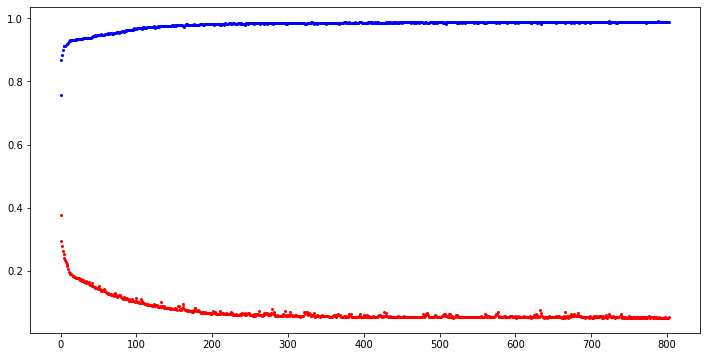

In [25]:
# x 값을 지정하고 정확도를 파란색으로, 오차를 빨간색으로 표시
x_len = np.arange(len(y_acc))
plt.figure(figsize=(12,6))
plt.plot(x_len, y_vloss, "o", c="red", markersize=2)
plt.plot(x_len, y_acc, "o", c="blue", markersize=2)

plt.show()